In [2]:
# Replicate the terminal digit analysis from the review project paper
# Erik P Bertelli
# UC Berkeley
# Stats 215A
# September 18 2016

In [82]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chisquare

filename = "datasets/Bishayee Colony Counts 10.27.97-3.8.01.xlsx"
df = pd.read_excel(filename, skiprows = [0,1])
df.as_matrix()
# deal with the missing value
#df = df[df['col3'] != ' ']
# get only the three columns
df_triples = df[['col1', 'col2', 'col3']].apply(pd.to_numeric,errors='coerce')
print(df_triples[:25])

    col1  col2   col3
0     78    91   93.0
1     90    88   90.0
2     80    66   69.0
3     63    67   71.0
4     44    58   64.0
5     38    53   51.0
6    247   264  258.0
7     46    24   27.0
8     64    63   61.0
9     77    82   98.0
10   115    98  109.0
11    87    95   98.0
12    41    31   38.0
13   146   155  178.0
14   112   105  104.0
15   117   143  136.0
16   117   133  114.0
17    38    57   53.0
18   170   171  176.0
19   102   108    NaN
20    74   100   79.0
21    85    90   70.0
22    38    32   44.0
23    28    41   26.0
24    28    29   27.0


In [95]:
def terminal_digit(a):
    return a % 10 

df_terminal = df_triples.apply(terminal_digit)
df_terminal_vector = np.concatenate((df_terminal['col1'],df_terminal['col2'],df_terminal['col3']))

df_terminal_vector = df_terminal_vector[np.logical_not(np.isnan(df_terminal_vector))]


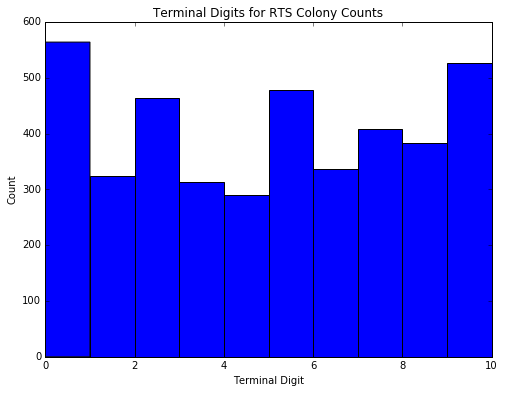

In [96]:
plt.figure(figsize=(8, 6))
plt.hist(df_terminal_vector, bins=np.arange(11))
plt.title('Terminal Digits for RTS Colony Counts')
plt.xlabel('Terminal Digit')
plt.ylabel('Count')

In [117]:
RTS_colony_hist = np.histogram(df_terminal_vector, bins=np.arange(11))
print(RTS_colony_hist[0])

chisquare(RTS_colony_hist[0])

[564 324 463 313 290 478 336 408 383 526]


Power_divergenceResult(statistic=200.72582619339045, pvalue=2.3337800143638883e-38)

In [106]:
filename2 = "datasets/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx"
df2 = pd.read_excel(filename2, skiprows = [0])
df2.as_matrix()
df2_triples = df2[['col1', 'col2', 'col3']].apply(pd.to_numeric,errors='coerce')

In [102]:
df2_terminal = df2_triples.apply(terminal_digit)
#df2_terminal = df2_terminal.dropna(how='all')
df2_terminal_vector = np.concatenate((df2_terminal['col1'],df2_terminal['col2'],df2_terminal['col3']))
df2_terminal_vector = df2_terminal_vector[np.logical_not(np.isnan(df2_terminal_vector))]

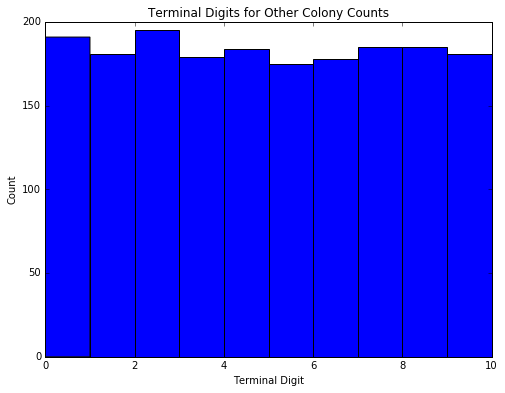

In [103]:
plt.figure(figsize=(8, 6))
plt.hist(df2_terminal_vector, bins=np.arange(11))
plt.title('Terminal Digits for Other Colony Counts')
plt.xlabel('Terminal Digit')
plt.ylabel('Count')

In [118]:
Other_colony_hist = np.histogram(df2_terminal_vector, bins=np.arange(11))
print(Other_colony_hist)

chisquare(Other_colony_hist[0])

(array([191, 181, 195, 179, 184, 175, 178, 185, 185, 181], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


Power_divergenceResult(statistic=1.79062159214831, pvalue=0.99436253377195383)

In [110]:
filename3 = "datasets/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx"
df3 = pd.read_excel(filename3, skiprows = [0], skipcolumns = [0])
df3.as_matrix()
#df3 = df3[df3['col3'] != ' ']
# df2[['col1', 'col2', 'col3']].head(10)
df3_triples = df3[['c1', 'c2', 'c3']].apply(pd.to_numeric)

In [111]:
df3_terminal = df3_triples.apply(terminal_digit)
df3_terminal_vector = np.concatenate((df3_terminal['c1'],df3_terminal['c2'],df3_terminal['c3']))

In [119]:
Outside_colony_hist = np.histogram(df3_terminal_vector, bins=np.arange(11))
print(Outside_colony_hist)

chisquare(Outside_colony_hist[0])

(array([21,  9, 15, 16, 19, 19,  9, 19, 11, 12], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


Power_divergenceResult(statistic=12.133333333333331, pvalue=0.20589657510344825)